<a href="https://colab.research.google.com/github/VermaVandana/Emotion-Detection/blob/main/Activation_Function_Assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#STEP 2: Load MNIST dataset (already split

In [ ]:
transform = transforms.ToTensor()

train_data = datasets.MNIST(
    root="data",
    train=True,     # TRAIN DATA
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,    # TEST DATA
    download=True,
    transform=transform
)

print("Train size:", len(train_data))
print("Test size:", len(test_data))


Train size: 60000
Test size: 10000


#STEP 3: Create DataLoaders

In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


#STEP 4: See one batch clearly

In [ ]:
images, labels = next(iter(train_loader))

print("Image batch shape:", images.shape)
print("Labels:", labels)


Image batch shape: torch.Size([64, 1, 28, 28])
Labels: tensor([5, 3, 7, 1, 7, 8, 1, 7, 9, 4, 4, 7, 6, 3, 5, 5, 9, 0, 7, 2, 0, 5, 8, 7,
        3, 6, 7, 7, 2, 7, 6, 2, 8, 4, 1, 1, 9, 1, 0, 4, 2, 2, 8, 7, 1, 3, 0, 8,
        2, 9, 8, 8, 2, 6, 7, 0, 3, 9, 0, 3, 0, 6, 2, 8])


In [ ]:
images, labels = next(iter(train_loader))

print("Image shape:", images.shape)
print("Labels shape:", labels.shape)
print("Labels:", labels)

Image shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])
Labels: tensor([2, 7, 4, 5, 8, 5, 9, 9, 2, 2, 0, 0, 9, 2, 7, 2, 9, 1, 9, 9, 8, 4, 4, 3,
        0, 4, 6, 0, 9, 0, 4, 2, 0, 0, 1, 9, 1, 0, 3, 5, 7, 9, 4, 0, 7, 9, 5, 3,
        9, 2, 3, 7, 6, 7, 0, 9, 1, 3, 2, 6, 1, 2, 4, 4])


#STEP 5: Define MLP (SIGMOID)

In [ ]:
class MLP_Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        print("Input:", x.shape)

        x = x.view(x.size(0), -1)
        print("After flatten:", x.shape)

        x = self.sigmoid(self.fc1(x))
        print("After FC1:", x.shape)

        x = self.sigmoid(self.fc2(x))
        print("After FC2:", x.shape)

        x = self.fc3(x)
        print("Output:", x.shape)

        return x


#STEP 5.1: Training function

In [ ]:
def train_model(model, train_loader):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses = []
    accuracies = []

    for epoch in range(5):
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            optimizer.zero_grad()

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(correct / total)

        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}, Accuracy={accuracies[-1]:.4f}")

    return losses, accuracies


#STEP 5.2: Train SIGMOID model

In [ ]:
sigmoid_model = MLP_Sigmoid()
sigmoid_loss, sigmoid_acc = train_model(sigmoid_model, train_loader)


Streaming output truncated to the last 5000 lines.
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1, 28, 28])
After flatten: torch.Size([64, 784])
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1, 28, 28])
After flatten: torch.Size([64, 784])
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1, 28, 28])
After flatten: torch.Size([64, 784])
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1, 28, 28])
After flatten: torch.Size([64, 784])
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1, 28, 28])
After flatten: torch.Size([64, 784])
After FC1: torch.Size([64, 128])
After FC2: torch.Size([64, 64])
Output: torch.Size([64, 10])
Input: torch.Size([64, 1,

# STEP 5.3: Plot SIGMOID results

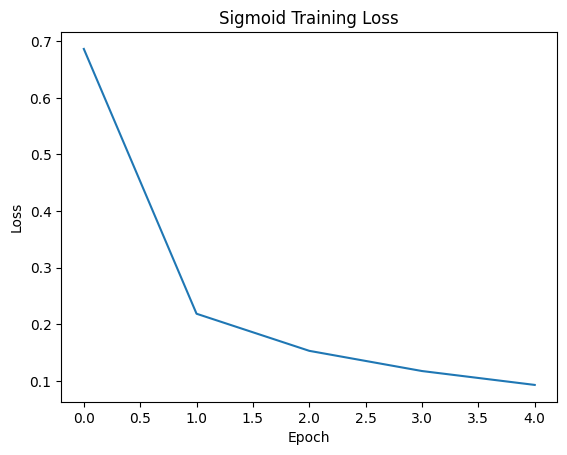

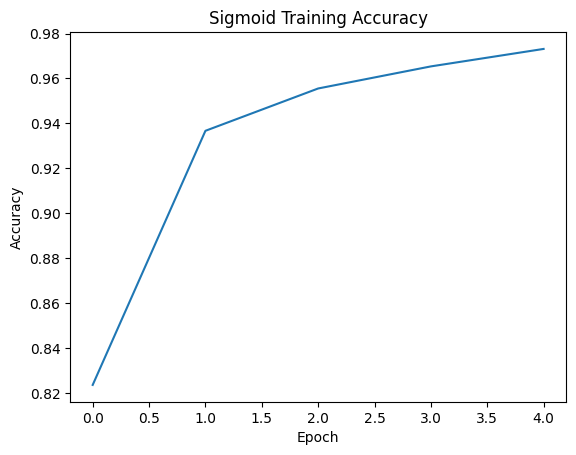

In [ ]:
plt.plot(sigmoid_loss)
plt.title("Sigmoid Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.plot(sigmoid_acc)
plt.title("Sigmoid Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


#STEP 6: Define MLP (TANH)

In [ ]:
class MLP_Tanh(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.tanh = nn.Tanh()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x


#STEP 6.1: Train TANH model

In [ ]:
tanh_model = MLP_Tanh()
tanh_loss, tanh_acc = train_model(tanh_model, train_loader)


Epoch 1: Loss=0.3279, Accuracy=0.9083
Epoch 2: Loss=0.1366, Accuracy=0.9594
Epoch 3: Loss=0.0914, Accuracy=0.9723
Epoch 4: Loss=0.0675, Accuracy=0.9798
Epoch 5: Loss=0.0501, Accuracy=0.9844


STEP 6.2: Result Graph of TANH model

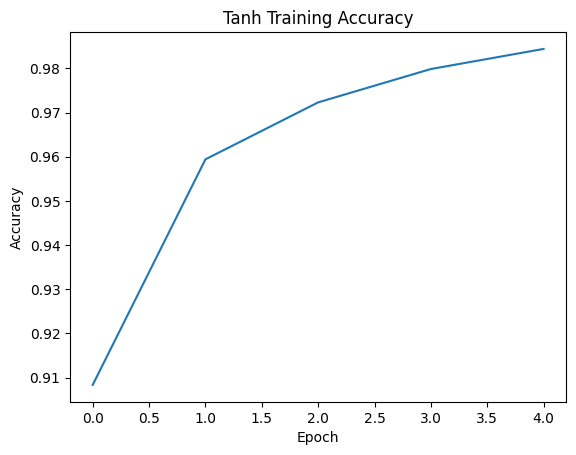

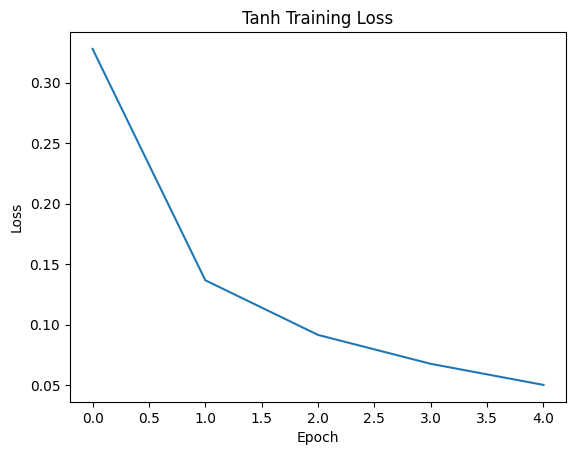

In [ ]:
plt.figure()
plt.plot(tanh_acc)
plt.title("Tanh Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(tanh_loss)
plt.title("Tanh Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


#STEP 7: ReLU MLP


In [ ]:
class MLP_ReLU(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


#STEP 7.2: Train ReLU model

In [ ]:
relu_model = MLP_ReLU()
relu_loss, relu_acc = train_model(relu_model, train_loader)


Epoch 1: Loss=0.3409, Accuracy=0.9052
Epoch 2: Loss=0.1407, Accuracy=0.9572
Epoch 3: Loss=0.0977, Accuracy=0.9703
Epoch 4: Loss=0.0750, Accuracy=0.9766
Epoch 5: Loss=0.0591, Accuracy=0.9823


#STEP 7.3: ReLU LOss &  Accuracy graph

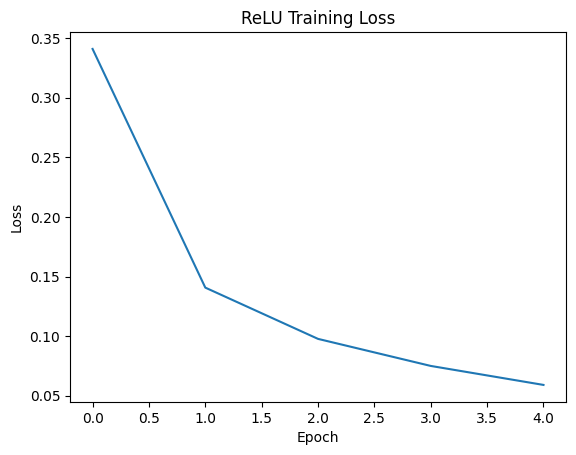

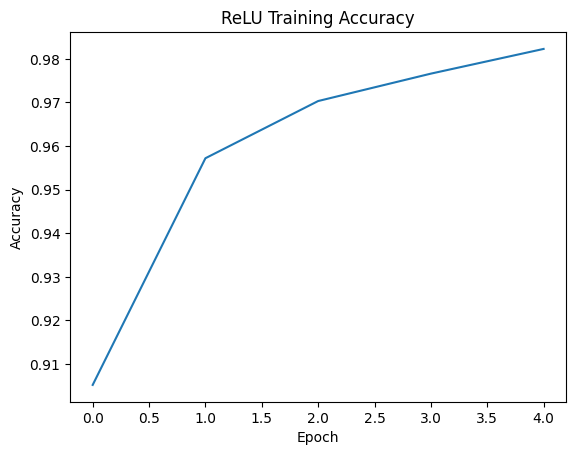

In [ ]:
plt.figure()
plt.plot(relu_loss)
plt.title("ReLU Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(relu_acc)
plt.title("ReLU Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()



#STEP 8.1: Leaky ReLU MLP

In [ ]:
class MLP_LeakyReLU(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x


#STEP 8.2: Train Leaky ReLU model

In [ ]:
leaky_model = MLP_LeakyReLU()
leaky_loss, leaky_acc = train_model(leaky_model, train_loader)


Epoch 1: Loss=0.3386, Accuracy=0.9048
Epoch 2: Loss=0.1382, Accuracy=0.9589
Epoch 3: Loss=0.0955, Accuracy=0.9715
Epoch 4: Loss=0.0718, Accuracy=0.9774
Epoch 5: Loss=0.0559, Accuracy=0.9825


#*STEP* 8.3: Leaky ReLU – LOSS graph & Accuracy graph

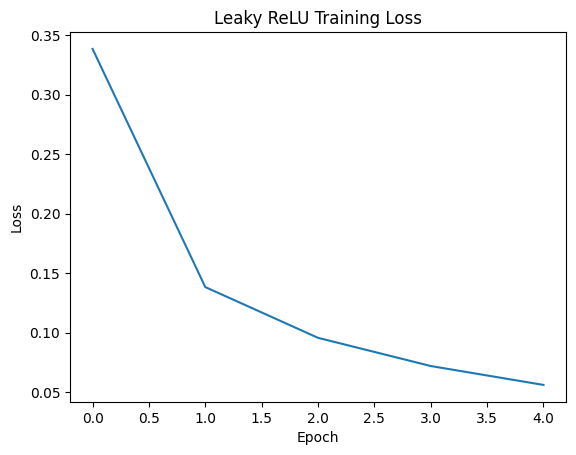

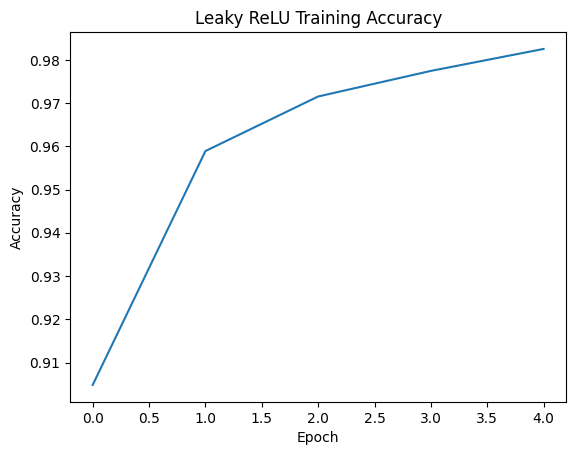

In [ ]:
plt.figure()
plt.plot(leaky_loss)
plt.title("Leaky ReLU Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(leaky_acc)
plt.title("Leaky ReLU Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()



#ACTIVATION FUNCTION: SWISH

 What is Swish?


  Swish(x)=x⋅σ(x)

Uses Sigmoid inside

-Smooth (no sharp cut like ReLU)

-Allows small negative values

-Often performs better than ReLU

#STEP 9: Swish activation

In [ ]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


#STEP 9.1: MLP with SWISH

In [ ]:
class MLP_Swish(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.swish = Swish()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.swish(self.fc1(x))
        x = self.swish(self.fc2(x))
        x = self.fc3(x)
        return x


STEP 9.2: Train Swish model

In [ ]:
swish_model = MLP_Swish()
swish_loss, swish_acc = train_model(swish_model, train_loader)


Epoch 1: Loss=0.3510, Accuracy=0.8984
Epoch 2: Loss=0.1545, Accuracy=0.9551
Epoch 3: Loss=0.1055, Accuracy=0.9683
Epoch 4: Loss=0.0773, Accuracy=0.9767
Epoch 5: Loss=0.0595, Accuracy=0.9815


#STEP 9.3: SWISH – Loss andACCURACY graph

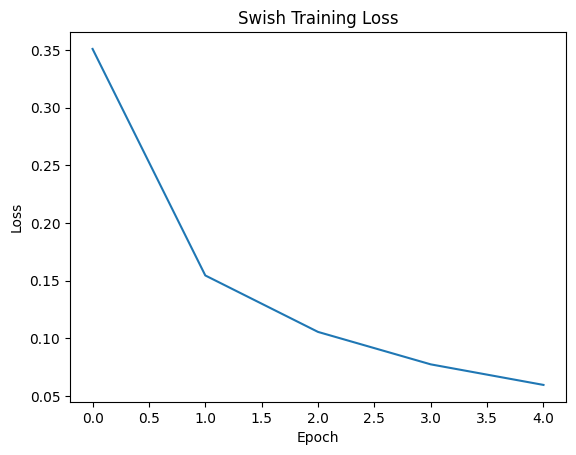

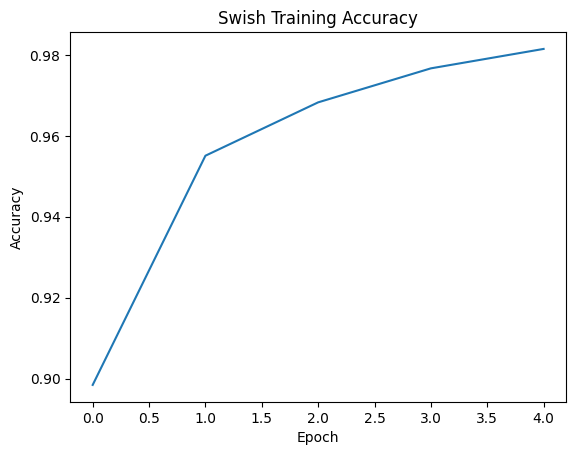

In [ ]:
plt.figure()
plt.plot(swish_loss)
plt.title("Swish Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(swish_acc)
plt.title("Swish Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()



#Step 10: ALL 5 ACTIVATION FUNCTIONS – LOSS COMPARISON GRAPH

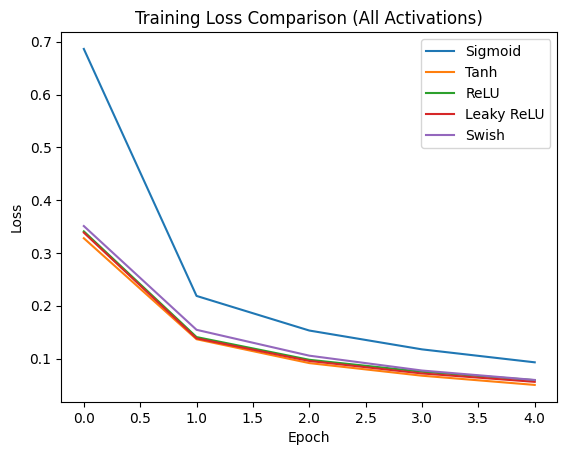

In [ ]:
plt.figure()
plt.plot(sigmoid_loss, label="Sigmoid")
plt.plot(tanh_loss, label="Tanh")
plt.plot(relu_loss, label="ReLU")
plt.plot(leaky_loss, label="Leaky ReLU")
plt.plot(swish_loss, label="Swish")

plt.title("Training Loss Comparison (All Activations)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


#ALL 5 ACTIVATION FUNCTIONS – ACCURACY COMPARISON GRAPH

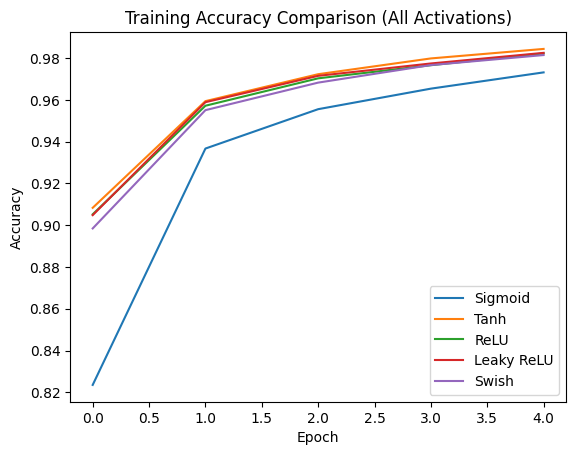

In [ ]:
plt.figure()
plt.plot(sigmoid_acc, label="Sigmoid")
plt.plot(tanh_acc, label="Tanh")
plt.plot(relu_acc, label="ReLU")
plt.plot(leaky_acc, label="Leaky ReLU")
plt.plot(swish_acc, label="Swish")

plt.title("Training Accuracy Comparison (All Activations)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
